In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
import pandas as pd
import numpy as np

DATA_PATH = "../raw_data/KI67.xlsx"  # <-- update if needed

In [20]:
# ============================================================
# STEP 1 — Data audit & sanity check (KI67.xlsx)
# Assumes: nothing. Loads the file and audits structure.
# Output: clean prints + summary tables for notebook.
# ============================================================

# -----------------------------
# 1) Load data
# -----------------------------
df_ki67 = pd.read_excel(DATA_PATH)

print("=== Dataset overview ===")
print(f"Shape (rows, cols): {df_ki67.shape}")
print("\nColumns:", df_ki67.columns.tolist())

# -----------------------------
# 2) Quick preview
# -----------------------------
print("\n=== Head (first 10 rows) ===")
display(df_ki67.head(10))

print("\n=== Data types ===")
display(df_ki67.dtypes.to_frame("dtype"))

# -----------------------------
# 3) Missing values
# -----------------------------
print("\n=== Missing values per column ===")
missing = df_ki67.isna().sum().sort_values(ascending=False)
display(missing.to_frame("n_missing"))

# -----------------------------
# 4) Unique values / cardinality
# -----------------------------
cat_cols = ["Line", "Enzyme", "Treatment"]
print("\n=== Cardinality (unique categories) ===")
cardinality = {c: df_ki67[c].nunique(dropna=False) for c in cat_cols}
display(pd.DataFrame.from_dict(cardinality, orient="index", columns=["n_unique"]))

for c in cat_cols:
    print(f"\n--- Unique values in '{c}' ---")
    display(pd.Series(sorted(df_ki67[c].astype(str).unique()), name=c))

# -----------------------------
# 5) Numeric sanity checks for ki67
# -----------------------------
print("\n=== Numeric summary: ki67 ===")
desc = df_ki67["ki67"].describe()
display(desc.to_frame("value"))

print("\n=== Potential outliers (IQR rule) ===")
q1 = df_ki67["ki67"].quantile(0.25)
q3 = df_ki67["ki67"].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = df_ki67[(df_ki67["ki67"] < lower) | (df_ki67["ki67"] > upper)].copy()
print(f"IQR bounds: [{lower:.2f}, {upper:.2f}]")
print(f"Number of IQR outliers: {len(outliers)}")
display(outliers if len(outliers) > 0 else pd.DataFrame({"message": ["No IQR outliers detected."]}))

# -----------------------------
# 6) Replication check (critical)
# -----------------------------
print("\n=== Replication check: Line × Enzyme × Treatment ===")
group_counts = (
    df_ki67
    .groupby(["Line", "Enzyme", "Treatment"], dropna=False)
    .size()
    .reset_index(name="n_obs")
    .sort_values("n_obs", ascending=False)
)

display(group_counts.head(15))

n_gt1 = (group_counts["n_obs"] > 1).sum()
n_eq1 = (group_counts["n_obs"] == 1).sum()

print(f"Groups with >1 observation: {n_gt1}")
print(f"Groups with exactly 1 observation: {n_eq1}")
print(f"Total unique groups: {len(group_counts)}")

# -----------------------------
# 7) Balance table (counts by factor levels)
# -----------------------------
print("\n=== Balance table: counts per factor level ===")
counts_line = df_ki67["Line"].value_counts().rename_axis("Line").reset_index(name="n")
counts_enzyme = df_ki67["Enzyme"].value_counts().rename_axis("Enzyme").reset_index(name="n")
counts_treat = df_ki67["Treatment"].value_counts().rename_axis("Treatment").reset_index(name="n")

display(counts_line)
display(counts_enzyme)
display(counts_treat)

# Optional: full contingency table (Line × Treatment)
print("\n=== Contingency: Line × Treatment ===")
display(pd.crosstab(df_ki67["Line"], df_ki67["Treatment"]))

# Optional: full contingency table (Line × Enzyme)
print("\n=== Contingency: Line × Enzyme ===")
display(pd.crosstab(df_ki67["Line"], df_ki67["Enzyme"]))


=== Dataset overview ===
Shape (rows, cols): (60, 4)

Columns: ['Line', 'Enzyme', 'Treatment', 'ki67']

=== Head (first 10 rows) ===


,Line,Enzyme,Treatment,ki67
0,RQ,L-Asparaginase,Control,97.9
1,RQ,L-Asparaginase,0.5,27.4
2,RQ,L-Asparaginase,0.7,12.0
3,RQ,L-Asparaginase,0.9,78.9
4,RQ,L-Glutaminase,Control,97.9
5,RQ,L-Glutaminase,0.5,35.7
6,RQ,L-Glutaminase,0.7,6.2
7,RQ,L-Glutaminase,0.9,93.4
8,RQ,Serine deaminase,Control,97.9
9,RQ,Serine deaminase,0.5,48.8



=== Data types ===


,dtype
Line,object
Enzyme,object
Treatment,object
ki67,float64



=== Missing values per column ===


,n_missing
Line,0
Enzyme,0
Treatment,0
ki67,0



=== Cardinality (unique categories) ===


,n_unique
Line,3
Enzyme,5
Treatment,4



--- Unique values in 'Line' ---


0      DFB
1    MCF-7
2       RQ
Name: Line, dtype: object


--- Unique values in 'Enzyme' ---


0    Arginine deiminase
1       Glycine oxidase
2        L-Asparaginase
3         L-Glutaminase
4      Serine deaminase
Name: Enzyme, dtype: object


--- Unique values in 'Treatment' ---


0        0.5
1        0.7
2        0.9
3    Control
Name: Treatment, dtype: object


=== Numeric summary: ki67 ===


,value
count,60.000000
mean,55.715000
std,30.055874
min,1.200000
25%,36.825000
50%,55.350000
75%,79.475000
max,98.500000



=== Potential outliers (IQR rule) ===
IQR bounds: [-27.15, 143.45]
Number of IQR outliers: 0


,message
0,No IQR outliers detected.



=== Replication check: Line × Enzyme × Treatment ===


,Line,Enzyme,Treatment,n_obs
0,DFB,Arginine deiminase,0.5,1
1,DFB,Arginine deiminase,0.7,1
2,DFB,Arginine deiminase,0.9,1
3,DFB,Arginine deiminase,Control,1
4,DFB,Glycine oxidase,0.5,1
5,DFB,Glycine oxidase,0.7,1
6,DFB,Glycine oxidase,0.9,1
7,DFB,Glycine oxidase,Control,1
8,DFB,L-Asparaginase,0.5,1
9,DFB,L-Asparaginase,0.7,1


Groups with >1 observation: 0
Groups with exactly 1 observation: 60
Total unique groups: 60

=== Balance table: counts per factor level ===


,Line,n
0,RQ,20
1,DFB,20
2,MCF-7,20


,Enzyme,n
0,L-Asparaginase,12
1,L-Glutaminase,12
2,Serine deaminase,12
3,Glycine oxidase,12
4,Arginine deiminase,12


,Treatment,n
0,Control,15
1,0.5,15
2,0.7,15
3,0.9,15



=== Contingency: Line × Treatment ===


Treatment,0.5,0.7,0.9,Control
Line,,,,
DFB,5,5,5,5
MCF-7,5,5,5,5
RQ,5,5,5,5



=== Contingency: Line × Enzyme ===


Enzyme,Arginine deiminase,Glycine oxidase,L-Asparaginase,L-Glutaminase,Serine deaminase
Line,,,,,
DFB,4,4,4,4,4
MCF-7,4,4,4,4,4
RQ,4,4,4,4,4


In [21]:
# ============================================================
# STEP 2 — Variable understanding & recoding (KI67)
# Purpose:
#   - Standardize categorical labels (Line, Enzyme, Treatment)
#   - Create ordered categorical treatment + numeric encoding
#   - Create normalized variants of ki67 (z-score global / within cell line)
#   - Optionally compute relative-to-control values when possible
# ============================================================

import pandas as pd
import numpy as np

# Assumes df_ki67 exists from STEP 1
df = df_ki67.copy()

# -----------------------------
# 1) Basic cleaning: strip spaces, unify text
# -----------------------------
for col in ["Line", "Enzyme", "Treatment"]:
    df[col] = df[col].astype(str).str.strip()

# Optional: unify naming conventions (only if needed)
# Example: replace inconsistent hyphens or casing
df["Line"] = df["Line"].str.replace(r"\s+", " ", regex=True)
df["Enzyme"] = df["Enzyme"].str.replace(r"\s+", " ", regex=True)
df["Treatment"] = df["Treatment"].str.replace(r"\s+", " ", regex=True)

print("=== Unique values after basic cleaning ===")
print("Line:", sorted(df["Line"].unique()))
print("Enzyme:", sorted(df["Enzyme"].unique()))
print("Treatment:", sorted(df["Treatment"].unique()))

# -----------------------------
# 2) Treatment recoding
#    - Ordered categorical
#    - Numeric mapping for plotting / modeling (optional)
# -----------------------------
# Define the expected treatment levels
treatment_order = ["Control", "0.5", "0.7", "0.9"]

# If the file uses something like "CTRL" or "control", normalize it
df["Treatment"] = df["Treatment"].replace({
    "control": "Control",
    "CONTROL": "Control",
    "ctrl": "Control",
    "CTRL": "Control",
})

# Keep a categorical ordered version
df["Treatment_cat"] = pd.Categorical(df["Treatment"], categories=treatment_order, ordered=True)

# Numeric mapping (Control -> 0.0)
treatment_map = {"Control": 0.0, "0.5": 0.5, "0.7": 0.7, "0.9": 0.9}
df["Treatment_num"] = df["Treatment"].map(treatment_map)

# Sanity checks
print("\n=== Treatment recoding check ===")
display(df[["Treatment", "Treatment_cat", "Treatment_num"]].drop_duplicates().sort_values("Treatment_num"))

n_unmapped = df["Treatment_num"].isna().sum()
if n_unmapped > 0:
    print(f"WARNING: {n_unmapped} rows have unmapped Treatment values.")
    display(df.loc[df["Treatment_num"].isna(), ["Treatment"]].value_counts().to_frame("count"))

# -----------------------------
# 3) Enzyme short codes (optional)
#    This helps labels/plots. Keep both full and short.
# -----------------------------
enzyme_short_map = {
    "L-Arginine deiminase": "ADI",
    "L-Asparaginase": "ASP",
    "L-Glutaminase": "GLU",
    "Glycine oxidase": "GO",
    "Serine dehydrogenase": "SDH",
}

df["Enzyme_short"] = df["Enzyme"].map(enzyme_short_map)

# Check which enzymes were not mapped (if any naming mismatch exists)
unmapped_enz = df["Enzyme_short"].isna().sum()
if unmapped_enz > 0:
    print(f"\nWARNING: {unmapped_enz} enzyme names were not mapped to short codes.")
    display(df.loc[df["Enzyme_short"].isna(), "Enzyme"].value_counts().to_frame("count"))

# -----------------------------
# 4) KI67 standardization variants
#    - Global z-score
#    - Within-cell-line z-score
# -----------------------------
# Global z-score
df["ki67_z"] = (df["ki67"] - df["ki67"].mean()) / df["ki67"].std(ddof=0)

# Z-score within cell line (useful if cell lines have different baselines)
df["ki67_z_within_line"] = (
    df.groupby("Line")["ki67"]
      .transform(lambda x: (x - x.mean()) / x.std(ddof=0))
)

print("\n=== Quick stats: KI67 variants ===")
display(df[["ki67", "ki67_z", "ki67_z_within_line"]].describe().T)

# -----------------------------
# 5) Relative-to-control computation (when possible)
#    For each Line×Enzyme, use Control as baseline.
#    If Control is missing for a group, result is NaN.
# -----------------------------
# Extract control baselines
control_df = (
    df[df["Treatment_cat"] == "Control"]
    .loc[:, ["Line", "Enzyme", "ki67"]]
    .rename(columns={"ki67": "ki67_control"})
)

# Merge baseline back
df = df.merge(control_df, on=["Line", "Enzyme"], how="left")

# Compute relative values
df["ki67_rel_to_control"] = df["ki67"] / df["ki67_control"]
df["ki67_pct_of_control"] = 100.0 * df["ki67_rel_to_control"]

# How many groups have control available?
control_coverage = (
    df.groupby(["Line", "Enzyme"])["ki67_control"]
      .apply(lambda x: x.notna().any())
      .reset_index(name="has_control")
)

print("\n=== Control coverage by Line×Enzyme ===")
display(control_coverage)

print("\n=== Rows with missing control baseline (cannot compute relative-to-control) ===")
missing_control_rows = df[df["ki67_control"].isna()][["Line", "Enzyme", "Treatment", "ki67"]]
print(f"Rows without control baseline: {len(missing_control_rows)}")
display(missing_control_rows.head(10))

# -----------------------------
# 6) Final cleaned dataframe for downstream EDA
# -----------------------------
df_clean = df.copy()

# Suggested column order
cols_order = [
    "Line", "Enzyme", "Enzyme_short",
    "Treatment", "Treatment_cat", "Treatment_num",
    "ki67", "ki67_z", "ki67_z_within_line",
    "ki67_control", "ki67_rel_to_control", "ki67_pct_of_control",
]
df_clean = df_clean[cols_order]

print("\n=== Final cleaned dataframe preview ===")
display(df_clean.head(10))

# Keep it as the canonical dataframe for next steps
df_ki67_clean = df_clean


=== Unique values after basic cleaning ===
Line: ['DFB', 'MCF-7', 'RQ']
Enzyme: ['Arginine deiminase', 'Glycine oxidase', 'L-Asparaginase', 'L-Glutaminase', 'Serine deaminase']
Treatment: ['0.5', '0.7', '0.9', 'Control']

=== Treatment recoding check ===


,Treatment,Treatment_cat,Treatment_num
0,Control,Control,0.0
1,0.5,0.5,0.5
2,0.7,0.7,0.7
3,0.9,0.9,0.9


,count
Enzyme,
Serine deaminase,12
Arginine deiminase,12



=== Quick stats: KI67 variants ===


,count,mean,std,min,25%,50%,75%,max
ki67,60.0,5.571500e+01,30.055874,1.200000,36.82500,55.350000,79.475000,98.500000
ki67_z,60.0,1.498801e-16,1.008439,-1.829095,-0.63380,-0.012247,0.797199,1.435528
ki67_z_within_line,60.0,-3.515706e-17,1.008439,-2.026464,-0.75464,0.219445,1.016208,1.381504



=== Control coverage by Line×Enzyme ===


,Line,Enzyme,has_control
0,DFB,Arginine deiminase,True
1,DFB,Glycine oxidase,True
2,DFB,L-Asparaginase,True
3,DFB,L-Glutaminase,True
4,DFB,Serine deaminase,True
5,MCF-7,Arginine deiminase,True
6,MCF-7,Glycine oxidase,True
7,MCF-7,L-Asparaginase,True
8,MCF-7,L-Glutaminase,True
9,MCF-7,Serine deaminase,True



=== Rows with missing control baseline (cannot compute relative-to-control) ===
Rows without control baseline: 0


,Line,Enzyme,Treatment,ki67



=== Final cleaned dataframe preview ===


,Line,Enzyme,Enzyme_short,Treatment,Treatment_cat,Treatment_num,ki67,ki67_z,ki67_z_within_line,ki67_control,ki67_rel_to_control,ki67_pct_of_control
0,RQ,L-Asparaginase,ASP,Control,Control,0.0,97.9,1.415397,1.107109,97.9,1.000000,100.000000
1,RQ,L-Asparaginase,ASP,0.5,0.5,0.5,27.4,-0.950029,-0.791716,97.9,0.279877,27.987743
2,RQ,L-Asparaginase,ASP,0.7,0.7,0.7,12.0,-1.466732,-1.206494,97.9,0.122574,12.257406
3,RQ,L-Asparaginase,ASP,0.9,0.9,0.9,78.9,0.777906,0.595369,97.9,0.805924,80.592441
4,RQ,L-Glutaminase,GLU,Control,Control,0.0,97.9,1.415397,1.107109,97.9,1.000000,100.000000
5,RQ,L-Glutaminase,GLU,0.5,0.5,0.5,35.7,-0.671546,-0.568166,97.9,0.364658,36.465781
6,RQ,L-Glutaminase,GLU,0.7,0.7,0.7,6.2,-1.661334,-1.362710,97.9,0.063330,6.332993
7,RQ,L-Glutaminase,GLU,0.9,0.9,0.9,93.4,1.264413,0.985907,97.9,0.954035,95.403473
8,RQ,Serine deaminase,NaN,Control,Control,0.0,97.9,1.415397,1.107109,97.9,1.000000,100.000000
9,RQ,Serine deaminase,NaN,0.5,0.5,0.5,48.8,-0.232013,-0.215335,97.9,0.498468,49.846782


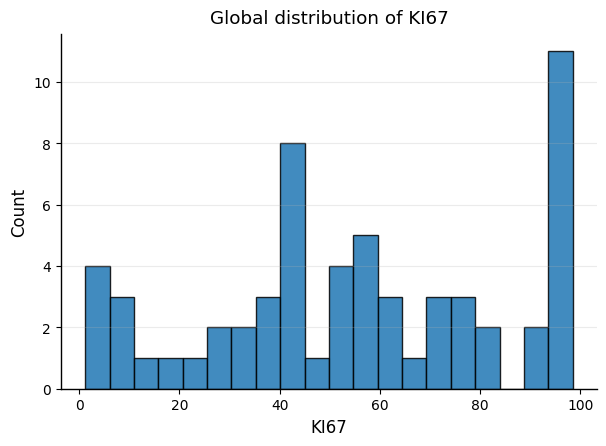

In [22]:
# ============================================================
# STEP 3.1 — Global distribution of KI67
# ============================================================

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    "font.size": 11,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "axes.linewidth": 1.0,
})

fig, ax = plt.subplots(figsize=(6.2, 4.6))

ax.hist(
    df_ki67_clean["ki67"],
    bins=20,
    edgecolor="black",
    alpha=0.85
)

ax.set_xlabel("KI67")
ax.set_ylabel("Count")
ax.set_title("Global distribution of KI67", pad=8)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", alpha=0.25)

plt.tight_layout()
plt.show()

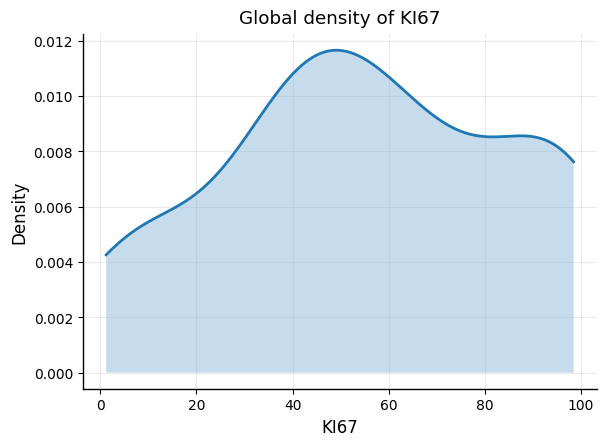

In [23]:
# ============================================================
# STEP 3.2 — Global KDE of KI67
# ============================================================

from scipy.stats import gaussian_kde

x = df_ki67_clean["ki67"].values
kde = gaussian_kde(x)

x_grid = np.linspace(x.min(), x.max(), 500)

fig, ax = plt.subplots(figsize=(6.2, 4.6))

ax.plot(x_grid, kde(x_grid), linewidth=2.0)
ax.fill_between(x_grid, kde(x_grid), alpha=0.25)

ax.set_xlabel("KI67")
ax.set_ylabel("Density")
ax.set_title("Global density of KI67", pad=8)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(alpha=0.25)

plt.tight_layout()
plt.show()


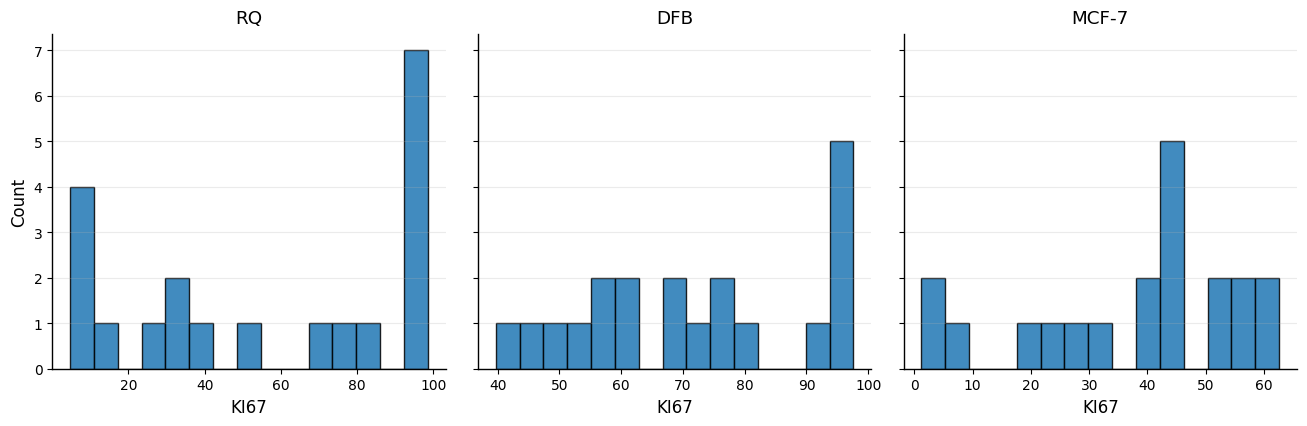

In [24]:
# ============================================================
# STEP 3.3 — KI67 distribution by Cell line
# ============================================================

cell_order = ["RQ", "DFB", "MCF-7"]

fig, axes = plt.subplots(1, 3, figsize=(13.2, 4.4), sharey=True)
axes = np.atleast_1d(axes)

for ax, cl in zip(axes, cell_order):
    data = df_ki67_clean.loc[df_ki67_clean["Line"] == cl, "ki67"]

    ax.hist(
        data,
        bins=15,
        edgecolor="black",
        alpha=0.85
    )

    ax.set_title(cl, pad=8)
    ax.set_xlabel("KI67")
    ax.grid(axis="y", alpha=0.25)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

axes[0].set_ylabel("Count")

plt.tight_layout()
plt.show()


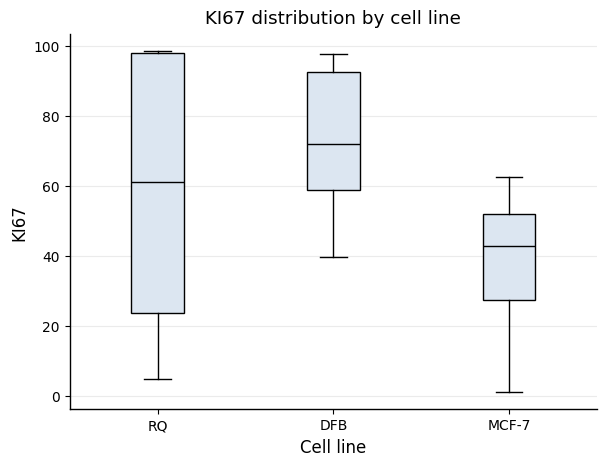

In [25]:
# ============================================================
# STEP 3.4 — Boxplot of KI67 by Cell line
# ============================================================

fig, ax = plt.subplots(figsize=(6.2, 4.8))

data = [
    df_ki67_clean.loc[df_ki67_clean["Line"] == cl, "ki67"]
    for cl in cell_order
]

ax.boxplot(
    data,
    labels=cell_order,
    showfliers=True,
    patch_artist=True,
    boxprops=dict(facecolor="#DCE6F1", edgecolor="black"),
    medianprops=dict(color="black"),
)

ax.set_xlabel("Cell line")
ax.set_ylabel("KI67")
ax.set_title("KI67 distribution by cell line", pad=8)

ax.grid(axis="y", alpha=0.25)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()


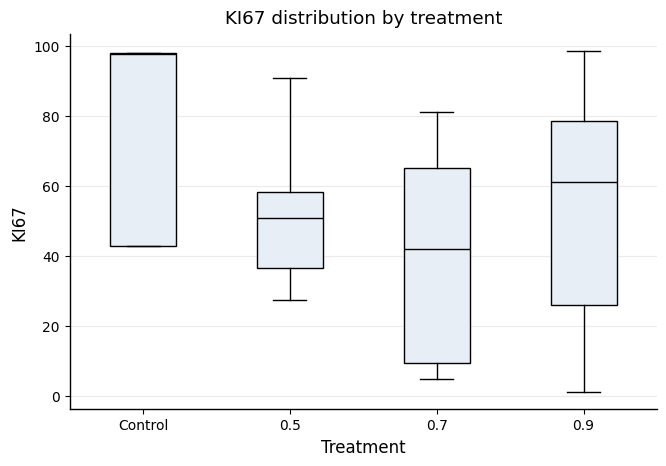

In [26]:
# ============================================================
# STEP 3.5 — KI67 distribution by Treatment
# ============================================================

treat_order = ["Control", "0.5", "0.7", "0.9"]

fig, ax = plt.subplots(figsize=(6.8, 4.8))

data = [
    df_ki67_clean.loc[df_ki67_clean["Treatment_cat"] == t, "ki67"]
    for t in treat_order
]

ax.boxplot(
    data,
    labels=treat_order,
    showfliers=True,
    patch_artist=True,
    boxprops=dict(facecolor="#E8EEF6", edgecolor="black"),
    medianprops=dict(color="black"),
)

ax.set_xlabel("Treatment")
ax.set_ylabel("KI67")
ax.set_title("KI67 distribution by treatment", pad=8)

ax.grid(axis="y", alpha=0.25)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()


In [27]:
# ============================================================
# STEP 3.6 — Summary tables
# ============================================================

# Global summary
summary_global = df_ki67_clean["ki67"].describe()
display(summary_global.to_frame("Global KI67"))

# By cell line
summary_by_line = (
    df_ki67_clean
    .groupby("Line")["ki67"]
    .describe()
)
display(summary_by_line)

# By treatment
summary_by_treat = (
    df_ki67_clean
    .groupby("Treatment_cat")["ki67"]
    .describe()
)
display(summary_by_treat)


,Global KI67
count,60.000000
mean,55.715000
std,30.055874
min,1.200000
25%,36.825000
50%,55.350000
75%,79.475000
max,98.500000


,count,mean,std,min,25%,50%,75%,max
Line,,,,,,,,
DFB,20.0,72.640,19.194116,39.7,58.775,71.95,92.425,97.6
MCF-7,20.0,37.710,18.484642,1.2,27.275,42.70,52.025,62.6
RQ,20.0,56.795,38.092760,4.7,23.550,61.10,97.900,98.5


,count,mean,std,min,25%,50%,75%,max
Treatment_cat,,,,,,,,
Control,15.0,79.400000,26.861949,42.7,42.70,97.6,97.90,97.9
0.5,15.0,48.806667,16.059864,27.4,36.45,50.8,58.35,90.7
0.7,15.0,40.953333,28.846239,4.7,9.45,41.9,65.25,81.2
0.9,15.0,53.700000,33.247621,1.2,25.85,61.1,78.40,98.5


In [28]:
# ============================================================
# STEP 4.1 — Mean KI67 by Line × Treatment
# ============================================================

summary_line_treat = (
    df_ki67_clean
    .groupby(["Line", "Treatment_cat"], observed=True)["ki67"]
    .mean()
    .reset_index(name="mean_ki67")
)

display(summary_line_treat)

# Pivoted version (for heatmaps)
pivot_line_treat = summary_line_treat.pivot(
    index="Line",
    columns="Treatment_cat",
    values="mean_ki67"
)

display(pivot_line_treat)


,Line,Treatment_cat,mean_ki67
0,DFB,Control,97.60
1,DFB,0.5,59.74
2,DFB,0.7,70.44
3,DFB,0.9,62.78
4,MCF-7,Control,42.70
5,MCF-7,0.5,49.86
6,MCF-7,0.7,45.32
7,MCF-7,0.9,12.96
8,RQ,Control,97.90
9,RQ,0.5,36.82


Treatment_cat,Control,0.5,0.7,0.9
Line,,,,
DFB,97.6,59.74,70.44,62.78
MCF-7,42.7,49.86,45.32,12.96
RQ,97.9,36.82,7.10,85.36


In [29]:
# ============================================================
# STEP 4.2 — Mean KI67 by Enzyme × Treatment
# ============================================================

summary_enzyme_treat = (
    df_ki67_clean
    .groupby(["Enzyme_short", "Treatment_cat"], observed=True)["ki67"]
    .mean()
    .reset_index(name="mean_ki67")
)

display(summary_enzyme_treat)

pivot_enzyme_treat = summary_enzyme_treat.pivot(
    index="Enzyme_short",
    columns="Treatment_cat",
    values="mean_ki67"
)

display(pivot_enzyme_treat)


,Enzyme_short,Treatment_cat,mean_ki67
0,ASP,Control,79.400000
1,ASP,0.5,31.866667
2,ASP,0.7,38.933333
3,ASP,0.9,52.700000
4,GLU,Control,79.400000
5,GLU,0.5,46.166667
6,GLU,0.7,38.966667
7,GLU,0.9,57.500000
8,GO,Control,79.400000
9,GO,0.5,50.800000


Treatment_cat,Control,0.5,0.7,0.9
Enzyme_short,,,,
ASP,79.4,31.866667,38.933333,52.700000
GLU,79.4,46.166667,38.966667,57.500000
GO,79.4,50.800000,40.133333,50.733333


In [30]:
# ============================================================
# STEP 4.3 — Mean KI67 by Line × Enzyme
# ============================================================

summary_line_enzyme = (
    df_ki67_clean
    .groupby(["Line", "Enzyme_short"], observed=True)["ki67"]
    .mean()
    .reset_index(name="mean_ki67")
)

display(summary_line_enzyme)

pivot_line_enzyme = summary_line_enzyme.pivot(
    index="Line",
    columns="Enzyme_short",
    values="mean_ki67"
)

display(pivot_line_enzyme)


,Line,Enzyme_short,mean_ki67
0,DFB,ASP,69.900
1,DFB,GLU,69.775
2,DFB,GO,75.050
3,MCF-7,ASP,28.225
4,MCF-7,GLU,38.450
5,MCF-7,GO,38.000
6,RQ,ASP,54.050
7,RQ,GLU,58.300
8,RQ,GO,52.750


Enzyme_short,ASP,GLU,GO
Line,,,
DFB,69.900,69.775,75.05
MCF-7,28.225,38.450,38.00
RQ,54.050,58.300,52.75


In [31]:
# ============================================================
# STEP 4.4 — Mean z-scored KI67 (within cell line)
# ============================================================

summary_line_enzyme_z = (
    df_ki67_clean
    .groupby(["Line", "Enzyme_short"], observed=True)["ki67_z_within_line"]
    .mean()
    .reset_index(name="mean_ki67_z_within_line")
)

display(summary_line_enzyme_z)

pivot_line_enzyme_z = summary_line_enzyme_z.pivot(
    index="Line",
    columns="Enzyme_short",
    values="mean_ki67_z_within_line"
)

display(pivot_line_enzyme_z)


,Line,Enzyme_short,mean_ki67_z_within_line
0,DFB,ASP,-0.146461
1,DFB,GLU,-0.153142
2,DFB,GO,0.128821
3,MCF-7,ASP,-0.526459
4,MCF-7,GLU,0.041073
5,MCF-7,GO,0.016096
6,RQ,ASP,-0.073933
7,RQ,GLU,0.040535
8,RQ,GO,-0.108947


Enzyme_short,ASP,GLU,GO
Line,,,
DFB,-0.146461,-0.153142,0.128821
MCF-7,-0.526459,0.041073,0.016096
RQ,-0.073933,0.040535,-0.108947


In [32]:
# ============================================================
# STEP 4.5 — Mean KI67 relative to Control
# ============================================================

summary_rel_control = (
    df_ki67_clean
    .groupby(["Line", "Enzyme_short", "Treatment_cat"], observed=True)["ki67_pct_of_control"]
    .mean()
    .reset_index(name="mean_pct_of_control")
)

display(summary_rel_control.head(10))

pivot_rel_control = summary_rel_control.pivot_table(
    index=["Line", "Enzyme_short"],
    columns="Treatment_cat",
    values="mean_pct_of_control"
)

display(pivot_rel_control)


,Line,Enzyme_short,Treatment_cat,mean_pct_of_control
0,DFB,ASP,Control,100.000000
1,DFB,ASP,0.5,40.676230
2,DFB,ASP,0.7,83.196721
3,DFB,ASP,0.9,62.602459
4,DFB,GLU,Control,100.000000
5,DFB,GLU,0.5,52.049180
6,DFB,GLU,0.7,54.098361
7,DFB,GLU,0.9,79.815574
8,DFB,GO,Control,100.000000
9,DFB,GO,0.5,60.143443


Treatment_cat       Control         0.5         0.7        0.9
Line  Enzyme_short                                            
DFB   ASP             100.0   40.676230   83.196721  62.602459
      GLU             100.0   52.049180   54.098361  79.815574
      GO              100.0   60.143443   75.614754  71.823770
MCF-7 ASP             100.0   66.744731   55.269321  42.388759
      GLU             100.0  121.779859  135.597190   2.810304
      GO              100.0  137.470726   98.126464  20.374707
RQ    ASP             100.0   27.987743   12.257406  80.592441
      GLU             100.0   36.465781    6.332993  95.403473
      GO              100.0   35.750766    4.800817  74.974464

In [33]:
# ============================================================
# STEP 4.6 — Observation counts per group
# ============================================================

counts_table = (
    df_ki67_clean
    .groupby(["Line", "Enzyme_short", "Treatment_cat"], observed=True)
    .size()
    .reset_index(name="n_obs")
)

display(counts_table.head(10))

# Quick check: all groups should have n_obs == 1
display(counts_table["n_obs"].value_counts())


,Line,Enzyme_short,Treatment_cat,n_obs
0,DFB,ASP,Control,1
1,DFB,ASP,0.5,1
2,DFB,ASP,0.7,1
3,DFB,ASP,0.9,1
4,DFB,GLU,Control,1
5,DFB,GLU,0.5,1
6,DFB,GLU,0.7,1
7,DFB,GLU,0.9,1
8,DFB,GO,Control,1
9,DFB,GO,0.5,1


n_obs
1    36
Name: count, dtype: int64

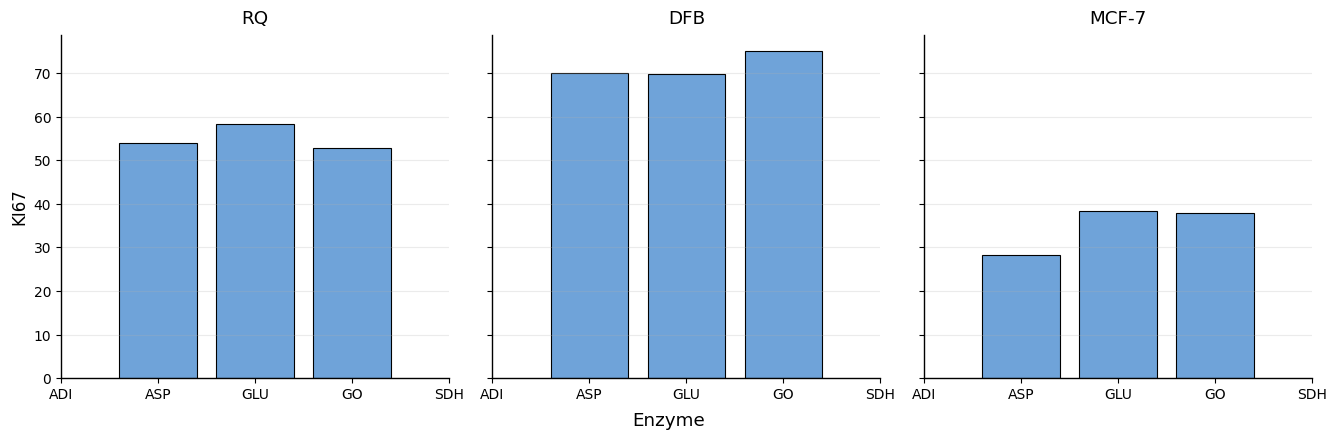

In [34]:
# ============================================================
# STEP 5.1 — KI67 vs Enzyme, faceted by Cell line
# ============================================================

import matplotlib.pyplot as plt
import numpy as np

cell_order = ["RQ", "DFB", "MCF-7"]
enzyme_order = ["ADI", "ASP", "GLU", "GO", "SDH"]

plt.rcParams.update({
    "font.size": 11,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "axes.linewidth": 1.0,
})

fig, axes = plt.subplots(1, 3, figsize=(13.5, 4.6), sharey=True)
axes = np.atleast_1d(axes)

for ax, cl in zip(axes, cell_order):
    d = df_ki67_clean[df_ki67_clean["Line"] == cl]

    means = (
        d.groupby("Enzyme_short")["ki67"]
         .mean()
         .reindex(enzyme_order)
    )

    x = np.arange(len(enzyme_order))

    ax.bar(
        x, means.values,
        color="#6FA3D9",
        edgecolor="black",
        linewidth=0.8
    )

    ax.set_xticks(x)
    ax.set_xticklabels(enzyme_order)
    ax.set_title(cl, pad=8)
    ax.grid(axis="y", alpha=0.25)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

axes[0].set_ylabel("KI67")
fig.supxlabel("Enzyme", y=0.05)

plt.tight_layout()
plt.show()

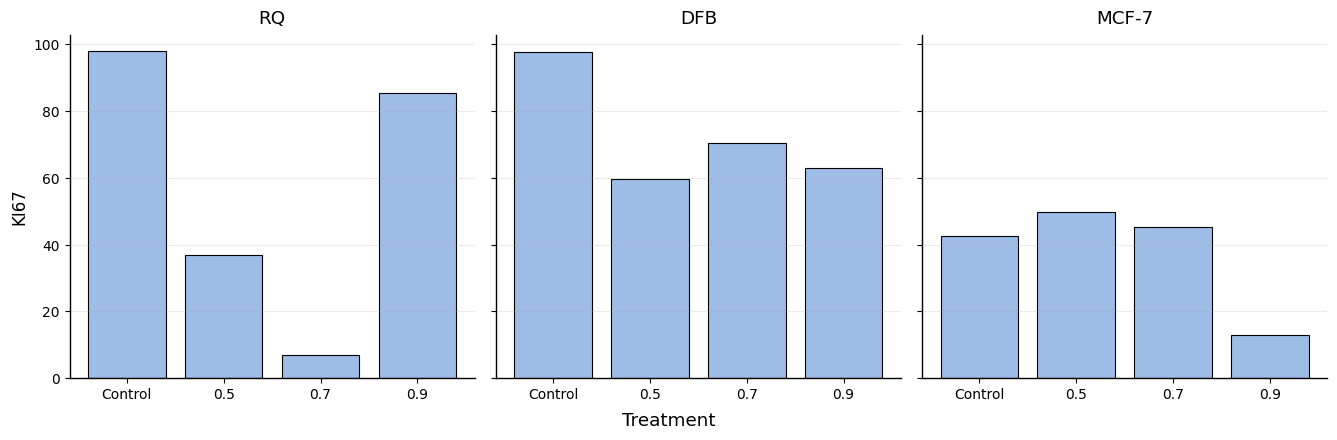

In [35]:
# ============================================================
# STEP 5.2 — KI67 vs Treatment, faceted by Cell line
# ============================================================

treat_order = ["Control", "0.5", "0.7", "0.9"]

fig, axes = plt.subplots(1, 3, figsize=(13.5, 4.6), sharey=True)
axes = np.atleast_1d(axes)

for ax, cl in zip(axes, cell_order):
    d = df_ki67_clean[df_ki67_clean["Line"] == cl]

    means = (
        d.groupby("Treatment_cat")["ki67"]
         .mean()
         .reindex(treat_order)
    )

    x = np.arange(len(treat_order))

    ax.bar(
        x, means.values,
        color="#9DBCE6",
        edgecolor="black",
        linewidth=0.8
    )

    ax.set_xticks(x)
    ax.set_xticklabels(treat_order)
    ax.set_title(cl, pad=8)
    ax.grid(axis="y", alpha=0.25)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

axes[0].set_ylabel("KI67")
fig.supxlabel("Treatment", y=0.05)

plt.tight_layout()
plt.show()

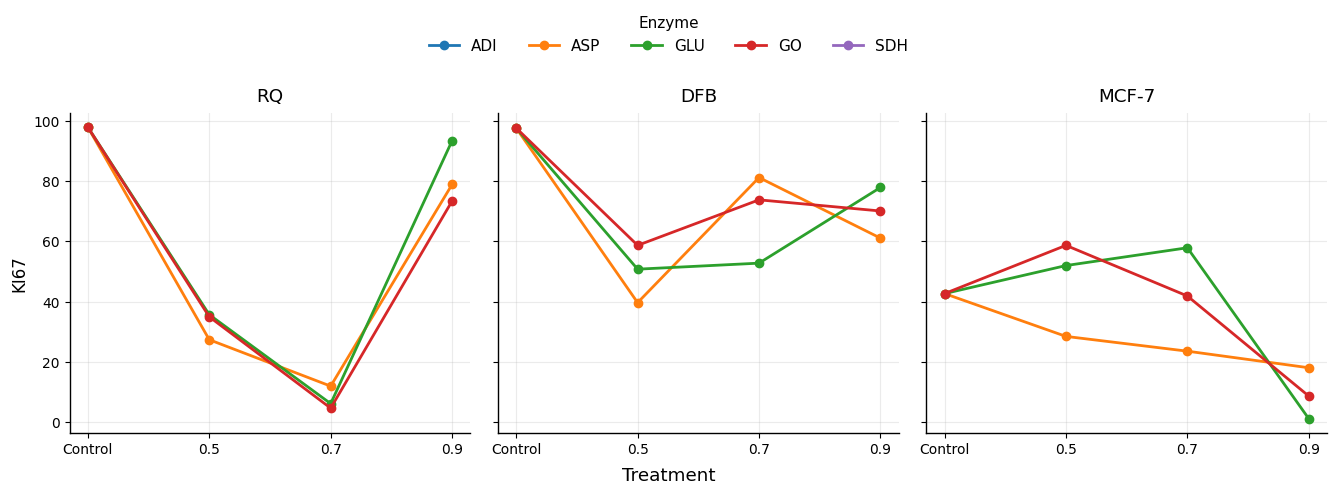

In [36]:
# ============================================================
# STEP 5.3 — Dose–response (KI67 vs Treatment) by Enzyme
# ============================================================

fig, axes = plt.subplots(1, 3, figsize=(13.5, 4.6), sharey=True)
axes = np.atleast_1d(axes)

x = np.arange(len(treat_order))

for ax, cl in zip(axes, cell_order):
    d = df_ki67_clean[df_ki67_clean["Line"] == cl]

    for enz in enzyme_order:
        sub = (
            d[d["Enzyme_short"] == enz]
            .groupby("Treatment_cat")["ki67"]
            .mean()
            .reindex(treat_order)
        )

        ax.plot(
            x, sub.values,
            marker="o",
            linewidth=2.0,
            label=enz
        )

    ax.set_xticks(x)
    ax.set_xticklabels(treat_order)
    ax.set_title(cl, pad=8)
    ax.grid(alpha=0.25)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

axes[0].set_ylabel("KI67")
fig.supxlabel("Treatment", y=0.05)

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title="Enzyme",
    loc="upper center",
    bbox_to_anchor=(0.5, 1.10),
    ncol=5,
    frameon=False
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


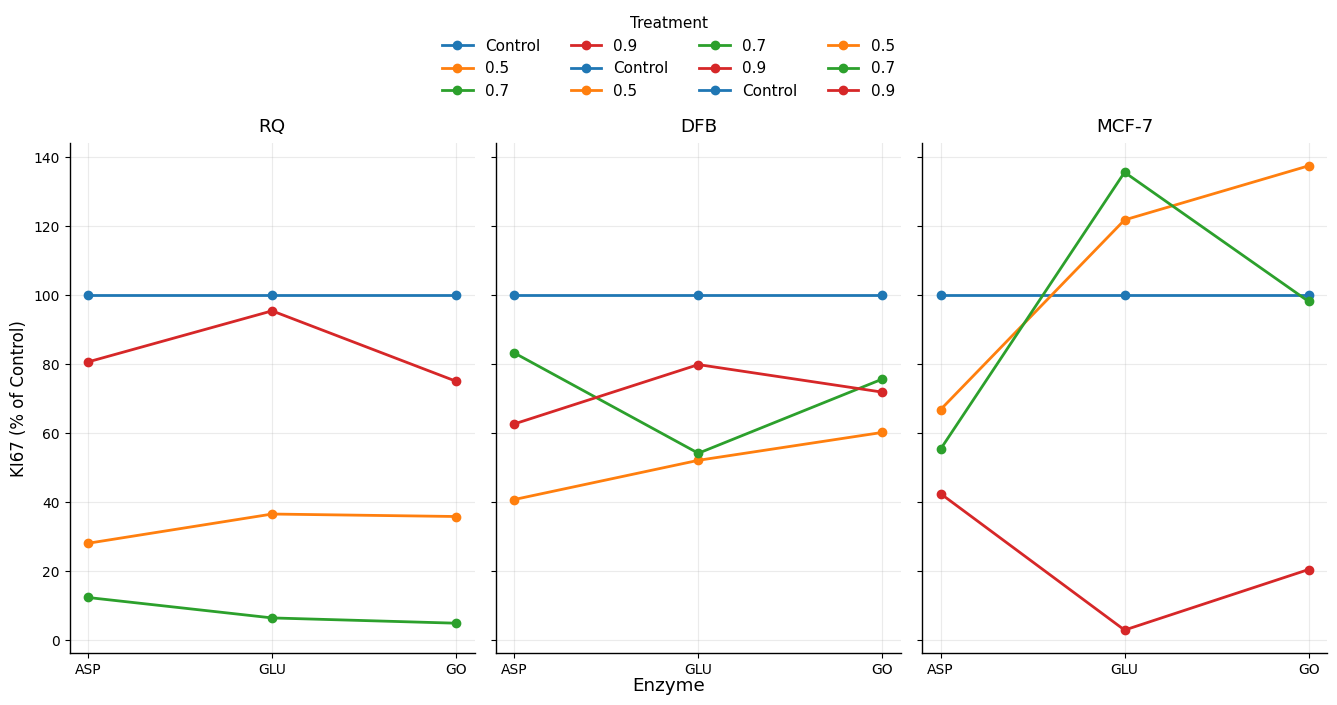

In [38]:
# ============================================================
# STEP 5.4 — KI67 as % of Control (faceted by Cell line)
# ============================================================

fig, axes = plt.subplots(1, 3, figsize=(13.5, 6.6), sharey=True)
axes = np.atleast_1d(axes)

for ax, cl in zip(axes, cell_order):
    d = df_ki67_clean[df_ki67_clean["Line"] == cl]

    means = (
        d.groupby(["Enzyme_short", "Treatment_cat"])["ki67_pct_of_control"]
         .mean()
         .unstack("Treatment_cat")
         .reindex(index=enzyme_order, columns=treat_order)
    )

    for i, t in enumerate(treat_order):
        ax.plot(
            enzyme_order,
            means[t].values,
            marker="o",
            linewidth=2.0,
            label=t
        )

    ax.set_title(cl, pad=8)
    ax.grid(alpha=0.25)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

axes[0].set_ylabel("KI67 (% of Control)")
fig.supxlabel("Enzyme", y=0.05)

fig.legend(
    title="Treatment",
    loc="upper center",
    bbox_to_anchor=(0.5, 1.10),
    ncol=4,
    frameon=False
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [39]:
# ============================================================
# STEP 6.1 — Pivot KI67 by Line × Enzyme × Treatment
# ============================================================

pivot_ki67 = (
    df_ki67_clean
    .pivot_table(
        index=["Line", "Enzyme_short"],
        columns="Treatment_cat",
        values="ki67",
        aggfunc="mean"
    )
)

display(pivot_ki67)


Treatment_cat       Control   0.5   0.7   0.9
Line  Enzyme_short                           
DFB   ASP              97.6  39.7  81.2  61.1
      GLU              97.6  50.8  52.8  77.9
      GO               97.6  58.7  73.8  70.1
MCF-7 ASP              42.7  28.5  23.6  18.1
      GLU              42.7  52.0  57.9   1.2
      GO               42.7  58.7  41.9   8.7
RQ    ASP              97.9  27.4  12.0  78.9
      GLU              97.9  35.7   6.2  93.4
      GO               97.9  35.0   4.7  73.4

In [40]:
# ============================================================
# STEP 6.2 — Delta computations
# ============================================================

delta_df = pivot_ki67.copy()

# Deltas vs Control
for t in ["0.5", "0.7", "0.9"]:
    delta_df[f"delta_{t}_vs_control"] = delta_df[t] - delta_df["Control"]

# Delta high vs low dose
delta_df["delta_0.9_vs_0.5"] = delta_df["0.9"] - delta_df["0.5"]

display(delta_df)


Treatment_cat       Control   0.5   0.7   0.9  delta_0.5_vs_control  \
Line  Enzyme_short                                                    
DFB   ASP              97.6  39.7  81.2  61.1                 -57.9   
      GLU              97.6  50.8  52.8  77.9                 -46.8   
      GO               97.6  58.7  73.8  70.1                 -38.9   
MCF-7 ASP              42.7  28.5  23.6  18.1                 -14.2   
      GLU              42.7  52.0  57.9   1.2                   9.3   
      GO               42.7  58.7  41.9   8.7                  16.0   
RQ    ASP              97.9  27.4  12.0  78.9                 -70.5   
      GLU              97.9  35.7   6.2  93.4                 -62.2   
      GO               97.9  35.0   4.7  73.4                 -62.9   

Treatment_cat       delta_0.7_vs_control  delta_0.9_vs_control  \
Line  Enzyme_short                                               
DFB   ASP                          -16.4                 -36.5   
      GLU                          -44.8                 -19.7   
      GO                           -23.8                 -27.5   
MCF-7 ASP                          -19.1                 -24.6   
      GLU                           15.2                 -41.5   
      GO                            -0.8                 -34.0   
RQ    ASP                          -85.9                 -19.0   
      GLU                          -91.7                  -4.5   
      GO                           -93.2                 -24.5   

Treatment_cat       delta_0.9_vs_0.5  
Line  Enzyme_short                    
DFB   ASP                       21.4  
      GLU                       27.1  
      GO                        11.4  
MCF-7 ASP                      -10.4  
      GLU                      -50.8  
      GO                       -50.0  
RQ    ASP                       51.5  
      GLU                       57.7  
      GO                        38.4

In [41]:
# ============================================================
# STEP 6.3 — Reshape delta table to long format
# ============================================================

delta_long = (
    delta_df.reset_index()
    .melt(
        id_vars=["Line", "Enzyme_short"],
        value_vars=[
            "delta_0.5_vs_control",
            "delta_0.7_vs_control",
            "delta_0.9_vs_control",
            "delta_0.9_vs_0.5"
        ],
        var_name="Delta_type",
        value_name="Delta_KI67"
    )
)

display(delta_long.head(10))


,Line,Enzyme_short,Delta_type,Delta_KI67
0,DFB,ASP,delta_0.5_vs_control,-57.9
1,DFB,GLU,delta_0.5_vs_control,-46.8
2,DFB,GO,delta_0.5_vs_control,-38.9
3,MCF-7,ASP,delta_0.5_vs_control,-14.2
4,MCF-7,GLU,delta_0.5_vs_control,9.3
5,MCF-7,GO,delta_0.5_vs_control,16.0
6,RQ,ASP,delta_0.5_vs_control,-70.5
7,RQ,GLU,delta_0.5_vs_control,-62.2
8,RQ,GO,delta_0.5_vs_control,-62.9
9,DFB,ASP,delta_0.7_vs_control,-16.4


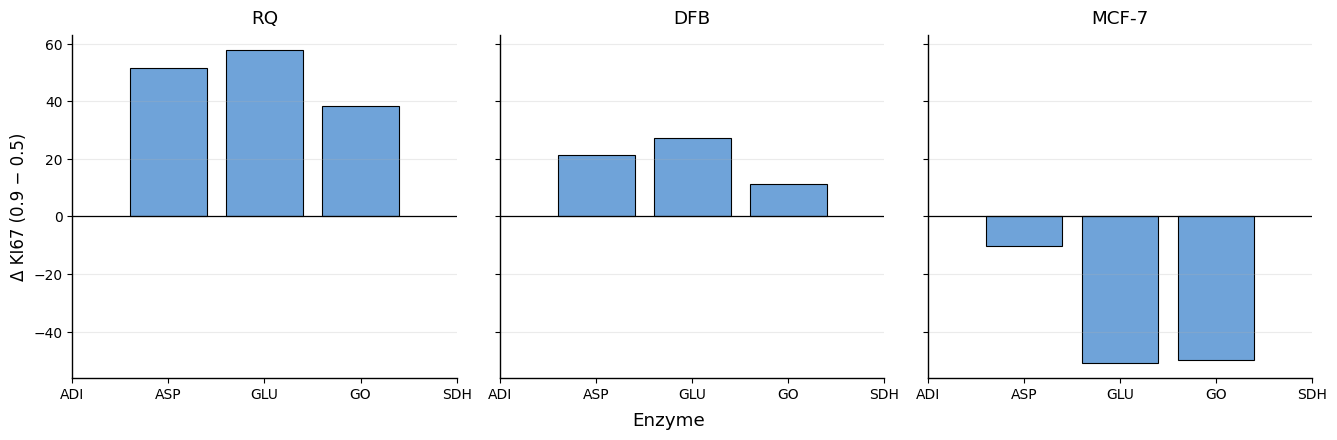

In [42]:
# ============================================================
# STEP 6.4 — Delta (0.9 − 0.5) by Enzyme, faceted by Cell line
# ============================================================

import matplotlib.pyplot as plt
import numpy as np

cell_order = ["RQ", "DFB", "MCF-7"]
enzyme_order = ["ADI", "ASP", "GLU", "GO", "SDH"]

plt.rcParams.update({
    "font.size": 11,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "axes.linewidth": 1.0,
})

fig, axes = plt.subplots(1, 3, figsize=(13.5, 4.6), sharey=True)
axes = np.atleast_1d(axes)

x = np.arange(len(enzyme_order))

for ax, cl in zip(axes, cell_order):
    d = delta_df.loc[cl].reindex(enzyme_order)

    ax.bar(
        x,
        d["delta_0.9_vs_0.5"].values,
        color="#6FA3D9",
        edgecolor="black",
        linewidth=0.8
    )

    ax.axhline(0, color="black", linewidth=0.9)
    ax.set_title(cl, pad=8)
    ax.set_xticks(x)
    ax.set_xticklabels(enzyme_order)
    ax.grid(axis="y", alpha=0.25)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

axes[0].set_ylabel("Δ KI67 (0.9 − 0.5)")
fig.supxlabel("Enzyme", y=0.05)

plt.tight_layout()
plt.show()


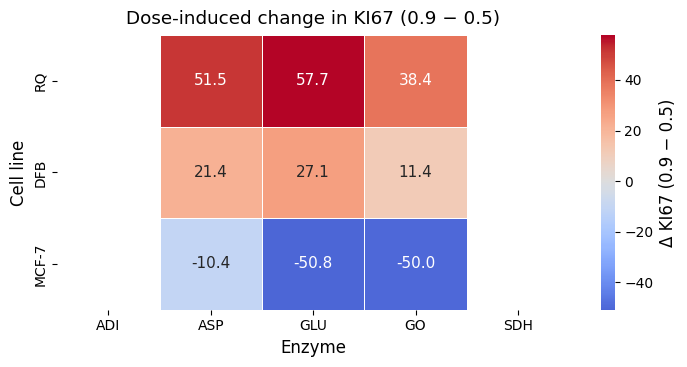

In [43]:
# ============================================================
# STEP 6.5 — Heatmap of Δ(0.9 − 0.5)
# ============================================================

import seaborn as sns

delta_heat = (
    delta_df["delta_0.9_vs_0.5"]
    .unstack("Enzyme_short")
    .reindex(index=cell_order, columns=enzyme_order)
)

plt.figure(figsize=(7.2, 3.8))
sns.heatmap(
    delta_heat,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".1f",
    linewidths=0.6,
    cbar_kws={"label": "Δ KI67 (0.9 − 0.5)"}
)

plt.xlabel("Enzyme")
plt.ylabel("Cell line")
plt.title("Dose-induced change in KI67 (0.9 − 0.5)", pad=8)
plt.tight_layout()
plt.show()


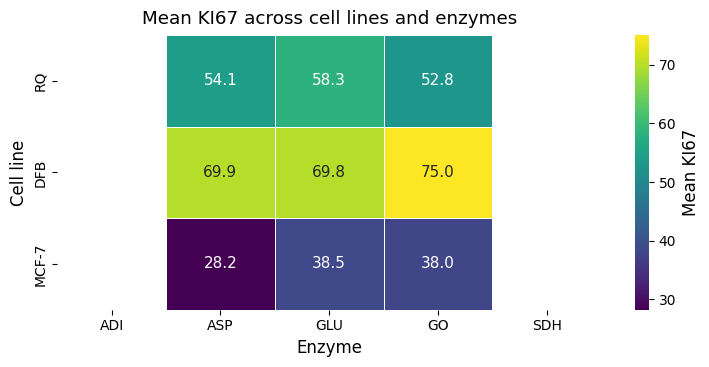

In [44]:
# ============================================================
# STEP 7.1 — Heatmap: mean KI67 (Line × Enzyme)
# ============================================================

import seaborn as sns
import matplotlib.pyplot as plt

cell_order = ["RQ", "DFB", "MCF-7"]
enzyme_order = ["ADI", "ASP", "GLU", "GO", "SDH"]

heat_raw = (
    df_ki67_clean
    .groupby(["Line", "Enzyme_short"])["ki67"]
    .mean()
    .unstack("Enzyme_short")
    .reindex(index=cell_order, columns=enzyme_order)
)

plt.figure(figsize=(7.6, 3.8))
sns.heatmap(
    heat_raw,
    cmap="viridis",
    annot=True,
    fmt=".1f",
    linewidths=0.6,
    cbar_kws={"label": "Mean KI67"}
)

plt.xlabel("Enzyme")
plt.ylabel("Cell line")
plt.title("Mean KI67 across cell lines and enzymes", pad=8)
plt.tight_layout()
plt.show()


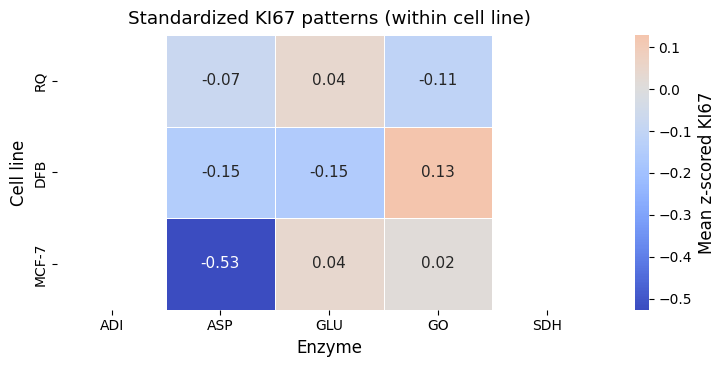

In [45]:
# ============================================================
# STEP 7.2 — Heatmap: z-scored KI67 (within cell line)
# ============================================================

heat_z = (
    df_ki67_clean
    .groupby(["Line", "Enzyme_short"])["ki67_z_within_line"]
    .mean()
    .unstack("Enzyme_short")
    .reindex(index=cell_order, columns=enzyme_order)
)

plt.figure(figsize=(7.6, 3.8))
sns.heatmap(
    heat_z,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.6,
    cbar_kws={"label": "Mean z-scored KI67"}
)

plt.xlabel("Enzyme")
plt.ylabel("Cell line")
plt.title("Standardized KI67 patterns (within cell line)", pad=8)
plt.tight_layout()
plt.show()


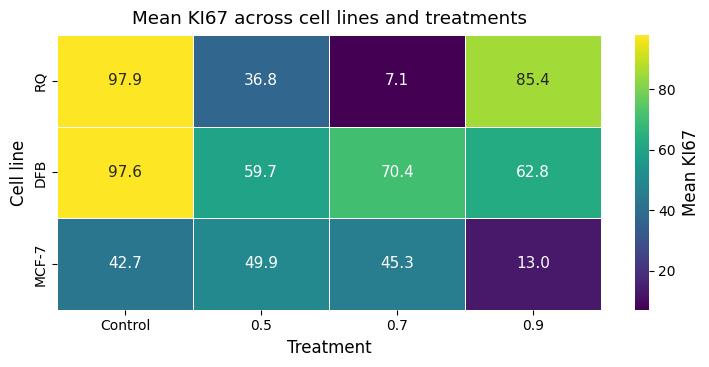

In [46]:
# ============================================================
# STEP 7.3 — Heatmap: mean KI67 (Line × Treatment)
# ============================================================

treat_order = ["Control", "0.5", "0.7", "0.9"]

heat_line_treat = (
    df_ki67_clean
    .groupby(["Line", "Treatment_cat"])["ki67"]
    .mean()
    .unstack("Treatment_cat")
    .reindex(index=cell_order, columns=treat_order)
)

plt.figure(figsize=(7.6, 3.8))
sns.heatmap(
    heat_line_treat,
    cmap="viridis",
    annot=True,
    fmt=".1f",
    linewidths=0.6,
    cbar_kws={"label": "Mean KI67"}
)

plt.xlabel("Treatment")
plt.ylabel("Cell line")
plt.title("Mean KI67 across cell lines and treatments", pad=8)
plt.tight_layout()
plt.show()


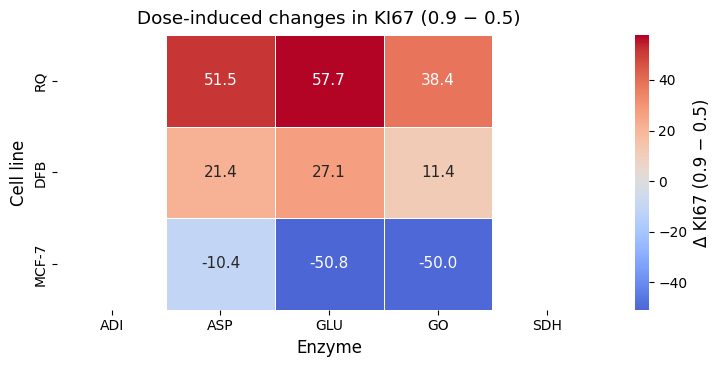

In [47]:
# ============================================================
# STEP 7.4 — Heatmap: Δ KI67 (0.9 − 0.5)
# ============================================================

delta_heat = (
    delta_df["delta_0.9_vs_0.5"]
    .unstack("Enzyme_short")
    .reindex(index=cell_order, columns=enzyme_order)
)

plt.figure(figsize=(7.6, 3.8))
sns.heatmap(
    delta_heat,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".1f",
    linewidths=0.6,
    cbar_kws={"label": "Δ KI67 (0.9 − 0.5)"}
)

plt.xlabel("Enzyme")
plt.ylabel("Cell line")
plt.title("Dose-induced changes in KI67 (0.9 − 0.5)", pad=8)
plt.tight_layout()
plt.show()


=== heat_z shape === (3, 5)
NaN cells: 6
Inf cells: 0

Where NaNs are located:


Enzyme_short,ADI,ASP,GLU,GO,SDH
Line,,,,,
RQ,True,False,False,False,True
DFB,True,False,False,False,True
MCF-7,True,False,False,False,True



Filling missing values with 0 (neutral for z-scored data).


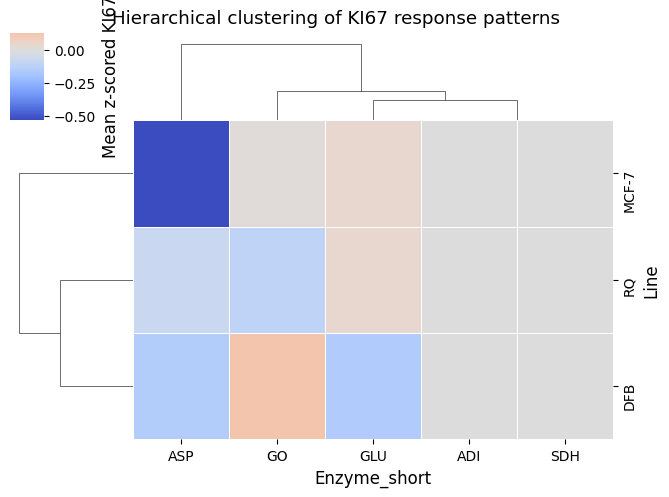

In [49]:
# ============================================================
# FIX — STEP 7.5: clustermap requires finite values (no NaN/inf)
# This block diagnoses and fixes heat_z before clustering.
# ============================================================

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Rebuild heat_z (safe)
cell_order = ["RQ", "DFB", "MCF-7"]
enzyme_order = ["ADI", "ASP", "GLU", "GO", "SDH"]

heat_z = (
    df_ki67_clean
    .groupby(["Line", "Enzyme_short"], observed=True)["ki67_z_within_line"]
    .mean()
    .unstack("Enzyme_short")
    .reindex(index=cell_order, columns=enzyme_order)
)

print("=== heat_z shape ===", heat_z.shape)

# 2) Diagnose NaN / inf
n_nan = heat_z.isna().sum().sum()
n_inf = np.isinf(heat_z.to_numpy()).sum()

print(f"NaN cells: {n_nan}")
print(f"Inf cells: {n_inf}")

if n_nan > 0:
    print("\nWhere NaNs are located:")
    display(heat_z.isna())

# 3) Replace inf with NaN (just in case)
heat_z = heat_z.replace([np.inf, -np.inf], np.nan)

# 4) Decide a strategy to handle NaNs
# Recommended: if NaNs exist, fill them with 0 (neutral in z-scored space)
# Alternative: drop rows/cols with NaNs (not great here due to small matrix)

if heat_z.isna().any().any():
    print("\nFilling missing values with 0 (neutral for z-scored data).")
    cluster_data = heat_z.fillna(0.0)
else:
    cluster_data = heat_z.copy()

# 5) Final sanity check
assert np.isfinite(cluster_data.to_numpy()).all(), "cluster_data still has non-finite values!"

# 6) Run clustermap
g = sns.clustermap(
    cluster_data,
    cmap="coolwarm",
    center=0,
    linewidths=0.6,
    figsize=(6.8, 4.8),
    cbar_kws={"label": "Mean z-scored KI67"},
    method="ward",
    metric="euclidean"
)

plt.suptitle("Hierarchical clustering of KI67 response patterns", y=1.03)
plt.show()


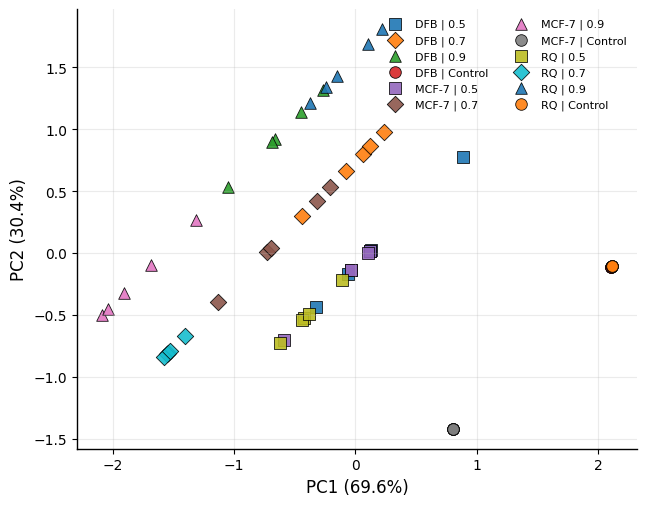

In [50]:
# ============================================================
# STEP 8A — PCA on KI67 (and optionally Treatment)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

dfp = df_ki67_clean.copy()

# Option 1 (recommended): PCA on [ki67, Treatment_num]
# This captures both response level and dose axis.
X = dfp[["ki67", "Treatment_num"]].copy()

# Safety: drop rows with missing Treatment_num (should not happen if mapped)
X = X.dropna()
dfp = dfp.loc[X.index].copy()

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2, random_state=0)
PC = pca.fit_transform(X_scaled)

df_pca = dfp.copy()
df_pca["PC1"] = PC[:, 0]
df_pca["PC2"] = PC[:, 1]

var_exp = pca.explained_variance_ratio_ * 100

# Plot
plt.rcParams.update({"font.size": 11, "axes.linewidth": 1.0})

fig, ax = plt.subplots(figsize=(6.6, 5.2))

# Color by cell line, marker by treatment
marker_map = {"Control": "o", "0.5": "s", "0.7": "D", "0.9": "^"}
line_color = {"RQ": "#2F5D9B", "DFB": "#6FA3D9", "MCF-7": "#B9D1F0"}

for (line, treat), sub in df_pca.groupby(["Line", "Treatment"], observed=True):
    ax.scatter(
        sub["PC1"], sub["PC2"],
        s=70,
        marker=marker_map.get(treat, "o"),
        edgecolor="black",
        linewidth=0.6,
        alpha=0.9,
        label=f"{line} | {treat}"
    )

ax.set_xlabel(f"PC1 ({var_exp[0]:.1f}%)")
ax.set_ylabel(f"PC2 ({var_exp[1]:.1f}%)")
ax.grid(alpha=0.25)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Legend (compact)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, frameon=False, fontsize=8, ncol=2)

plt.tight_layout()
plt.show()

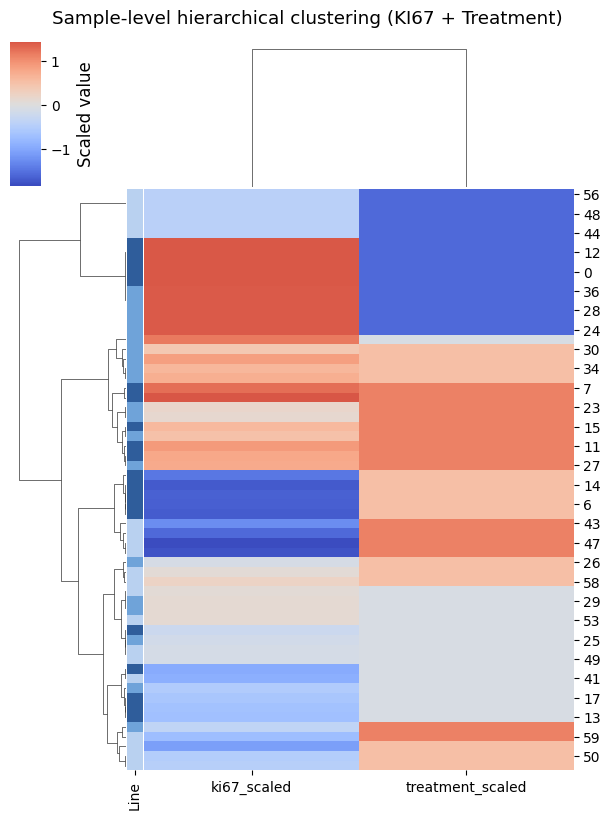

In [52]:
# ============================================================
# Option B — Use 2 features so both row/col clustering works
# ============================================================

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

dfc = df_ki67_clean.copy()

# Use both response + dose axis (then scale both)
X = dfc[["ki67", "Treatment_num"]].copy()
X = X.replace([np.inf, -np.inf], np.nan).dropna()

X_scaled = StandardScaler().fit_transform(X)
features2 = pd.DataFrame(X_scaled, index=X.index, columns=["ki67_scaled", "treatment_scaled"])

line_palette = {"RQ": "#2F5D9B", "DFB": "#6FA3D9", "MCF-7": "#B9D1F0"}
row_colors = dfc.loc[X.index, "Line"].map(line_palette)

g = sns.clustermap(
    features2,
    method="ward",
    metric="euclidean",
    cmap="coolwarm",
    center=0,
    figsize=(6.2, 8.0),
    row_colors=row_colors,
    linewidths=0.0,
    cbar_kws={"label": "Scaled value"}
)

plt.suptitle("Sample-level hierarchical clustering (KI67 + Treatment)", y=1.02)
plt.show()


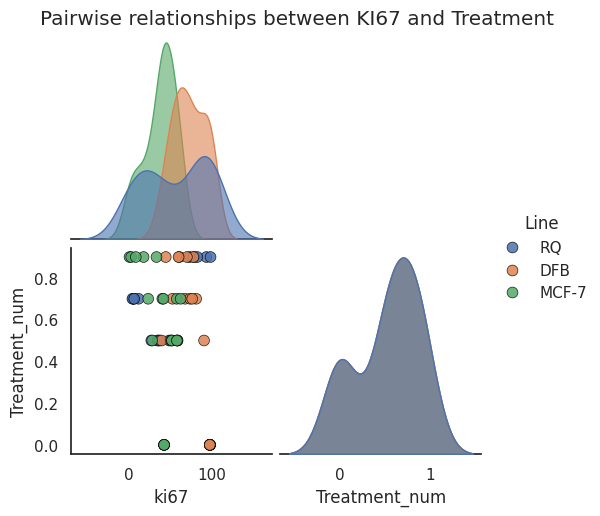

In [53]:
# ============================================================
# STEP 9.1 — Global pairplot: KI67 vs Treatment
# ============================================================

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", context="notebook")

pair_df = df_ki67_clean[[
    "ki67",
    "Treatment_num",
    "Line"
]].copy()

g = sns.pairplot(
    pair_df,
    vars=["ki67", "Treatment_num"],
    hue="Line",
    corner=True,
    plot_kws=dict(
        s=60,
        edgecolor="black",
        linewidth=0.5,
        alpha=0.85
    ),
    diag_kws=dict(
        fill=True,
        alpha=0.6
    )
)

g.fig.suptitle("Pairwise relationships between KI67 and Treatment", y=1.02)
plt.show()


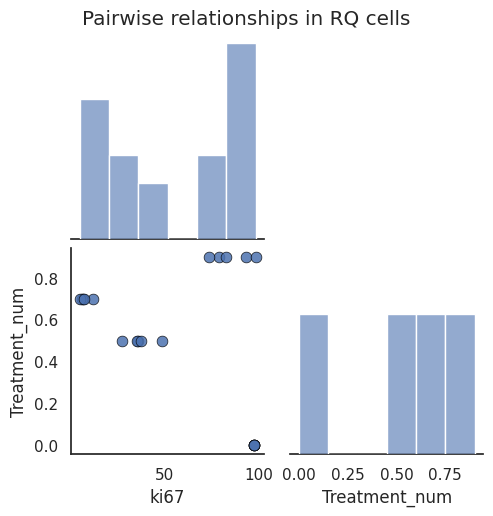

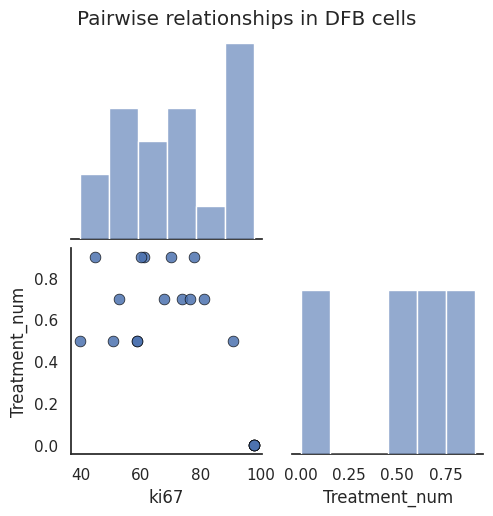

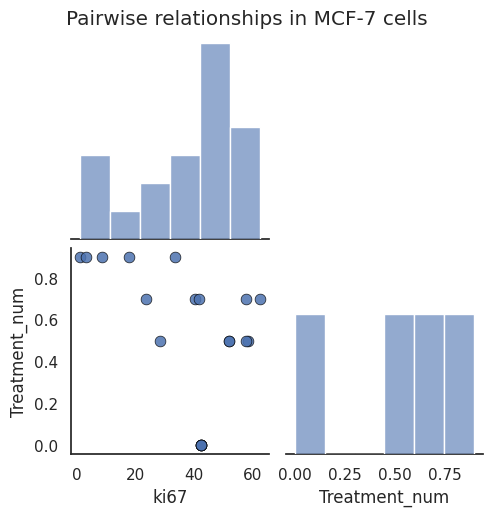

In [54]:
# ============================================================
# STEP 9.2 — Pairplot faceted by Cell line
# ============================================================

for cl in ["RQ", "DFB", "MCF-7"]:
    sub = df_ki67_clean[df_ki67_clean["Line"] == cl]

    g = sns.pairplot(
        sub[["ki67", "Treatment_num"]],
        corner=True,
        plot_kws=dict(
            s=60,
            edgecolor="black",
            linewidth=0.5,
            alpha=0.85
        ),
        diag_kws=dict(
            fill=True,
            alpha=0.6
        )
    )

    g.fig.suptitle(f"Pairwise relationships in {cl} cells", y=1.02)
    plt.show()


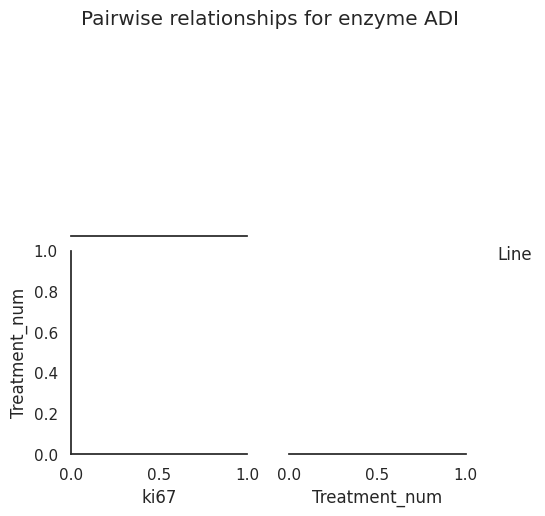

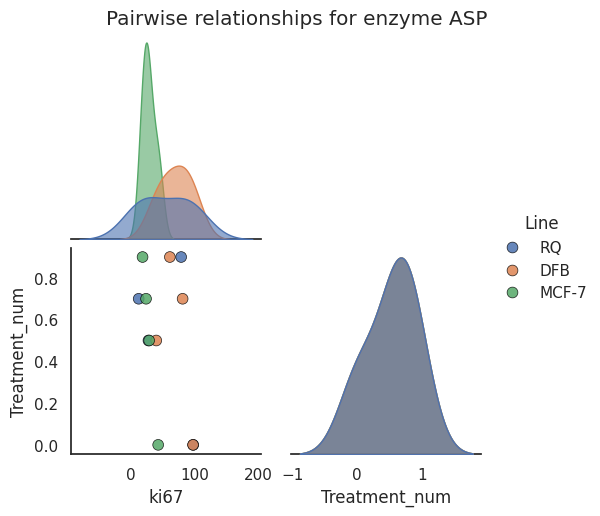

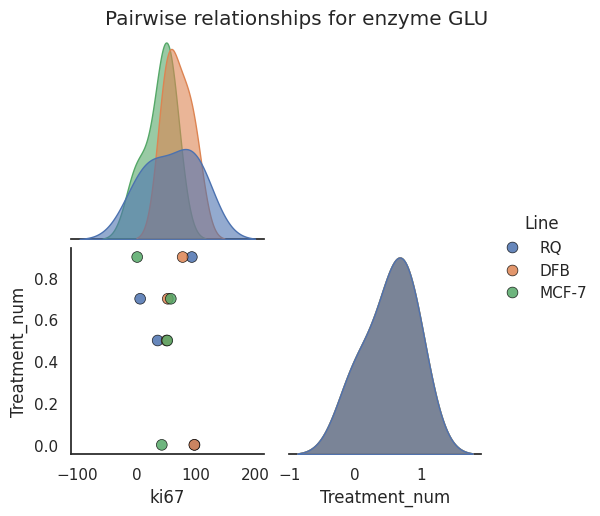

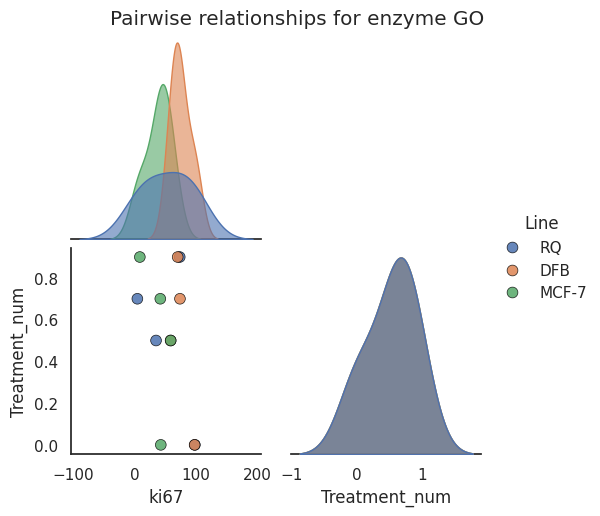

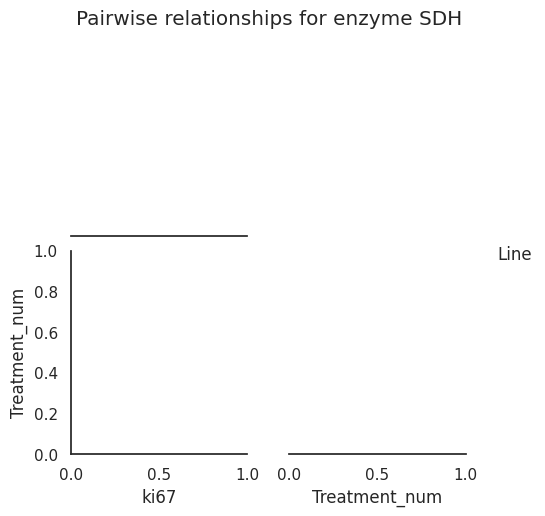

In [55]:
# ============================================================
# STEP 9.3 — Pairplot faceted by Enzyme
# ============================================================

for enz in ["ADI", "ASP", "GLU", "GO", "SDH"]:
    sub = df_ki67_clean[df_ki67_clean["Enzyme_short"] == enz]

    g = sns.pairplot(
        sub[["ki67", "Treatment_num", "Line"]],
        vars=["ki67", "Treatment_num"],
        hue="Line",
        corner=True,
        plot_kws=dict(
            s=60,
            edgecolor="black",
            linewidth=0.5,
            alpha=0.85
        ),
        diag_kws=dict(
            fill=True,
            alpha=0.6
        )
    )

    g.fig.suptitle(f"Pairwise relationships for enzyme {enz}", y=1.02)
    plt.show()


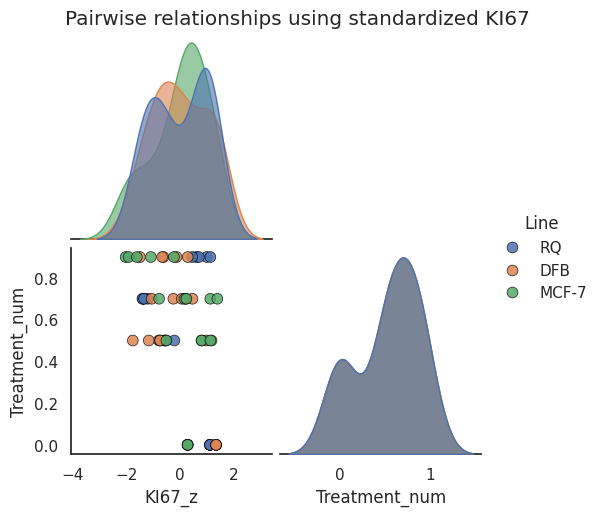

In [56]:
# ============================================================
# STEP 9.4 — Pairplot using z-scored KI67
# ============================================================

pair_z = df_ki67_clean[[
    "ki67_z_within_line",
    "Treatment_num",
    "Line"
]].rename(columns={"ki67_z_within_line": "KI67_z"})

g = sns.pairplot(
    pair_z,
    vars=["KI67_z", "Treatment_num"],
    hue="Line",
    corner=True,
    plot_kws=dict(
        s=60,
        edgecolor="black",
        linewidth=0.5,
        alpha=0.85
    ),
    diag_kws=dict(
        fill=True,
        alpha=0.6
    )
)

g.fig.suptitle("Pairwise relationships using standardized KI67", y=1.02)
plt.show()


In [57]:
# ============================================================
# STEP 10.1 — Global enzyme ranking by mean KI67
# ============================================================

rank_enzyme_global = (
    df_ki67_clean
    .groupby("Enzyme_short")["ki67"]
    .mean()
    .sort_values(ascending=False)
    .reset_index(name="mean_ki67")
)

rank_enzyme_global["rank"] = np.arange(1, len(rank_enzyme_global) + 1)

display(rank_enzyme_global)


,Enzyme_short,mean_ki67,rank
0,GLU,55.508333,1
1,GO,55.266667,2
2,ASP,50.725000,3


In [58]:
# ============================================================
# STEP 10.2 — Enzyme ranking within each cell line
# ============================================================

rank_enzyme_by_line = (
    df_ki67_clean
    .groupby(["Line", "Enzyme_short"])["ki67"]
    .mean()
    .reset_index(name="mean_ki67")
)

rank_enzyme_by_line["rank"] = (
    rank_enzyme_by_line
    .groupby("Line")["mean_ki67"]
    .rank(ascending=False, method="dense")
)

rank_enzyme_by_line = rank_enzyme_by_line.sort_values(["Line", "rank"])

display(rank_enzyme_by_line)


,Line,Enzyme_short,mean_ki67,rank
2,DFB,GO,75.050,1.0
0,DFB,ASP,69.900,2.0
1,DFB,GLU,69.775,3.0
4,MCF-7,GLU,38.450,1.0
5,MCF-7,GO,38.000,2.0
3,MCF-7,ASP,28.225,3.0
7,RQ,GLU,58.300,1.0
6,RQ,ASP,54.050,2.0
8,RQ,GO,52.750,3.0


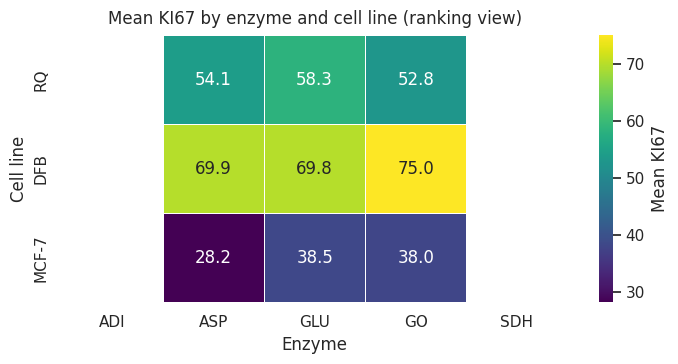

In [59]:
# ============================================================
# STEP 10.3 — Ranking heatmap (mean KI67)
# ============================================================

import seaborn as sns
import matplotlib.pyplot as plt

rank_matrix = (
    rank_enzyme_by_line
    .pivot(index="Line", columns="Enzyme_short", values="mean_ki67")
    .reindex(index=["RQ", "DFB", "MCF-7"], columns=["ADI", "ASP", "GLU", "GO", "SDH"])
)

plt.figure(figsize=(7.2, 3.8))
sns.heatmap(
    rank_matrix,
    cmap="viridis",
    annot=True,
    fmt=".1f",
    linewidths=0.6,
    cbar_kws={"label": "Mean KI67"}
)

plt.xlabel("Enzyme")
plt.ylabel("Cell line")
plt.title("Mean KI67 by enzyme and cell line (ranking view)", pad=8)
plt.tight_layout()
plt.show()


In [60]:
# ============================================================
# STEP 10.4 — Enzyme ranking using z-scored KI67 (within line)
# ============================================================

rank_enzyme_z = (
    df_ki67_clean
    .groupby(["Line", "Enzyme_short"])["ki67_z_within_line"]
    .mean()
    .reset_index(name="mean_ki67_z")
)

rank_enzyme_z["rank"] = (
    rank_enzyme_z
    .groupby("Line")["mean_ki67_z"]
    .rank(ascending=False, method="dense")
)

rank_enzyme_z = rank_enzyme_z.sort_values(["Line", "rank"])

display(rank_enzyme_z)


,Line,Enzyme_short,mean_ki67_z,rank
2,DFB,GO,0.128821,1.0
0,DFB,ASP,-0.146461,2.0
1,DFB,GLU,-0.153142,3.0
4,MCF-7,GLU,0.041073,1.0
5,MCF-7,GO,0.016096,2.0
3,MCF-7,ASP,-0.526459,3.0
7,RQ,GLU,0.040535,1.0
6,RQ,ASP,-0.073933,2.0
8,RQ,GO,-0.108947,3.0


In [61]:
# ============================================================
# STEP 10.5 — Cell line ranking by mean KI67
# ============================================================

rank_line_global = (
    df_ki67_clean
    .groupby("Line")["ki67"]
    .mean()
    .sort_values(ascending=False)
    .reset_index(name="mean_ki67")
)

rank_line_global["rank"] = np.arange(1, len(rank_line_global) + 1)

display(rank_line_global)


,Line,mean_ki67,rank
0,DFB,72.640,1
1,RQ,56.795,2
2,MCF-7,37.710,3
